# Simple Regressor

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from seaborn import regplot
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df=pd.read_csv('more_data2.csv')
df = df.drop('eng_mfgr', axis = 1)
df = df.drop('acft_make', axis = 1)
df = df.drop('acft_model', axis = 1)
df = df.dropna()

In [3]:
X = df
X_number = X.select_dtypes(include='number')
X_category = X.select_dtypes(exclude='number')
#X_number = (X_number - X_number.mean())/X_number.std()
X_category = pd.get_dummies(X_category)
X = pd.concat([X_number, X_category], axis =1)
X_full = X
Y=X.inj_tot_t
X = X.drop('inj_tot_t', axis = 1)
Y.head()

27    2.0
37    2.0
39    3.0
40    4.0
41    1.0
Name: inj_tot_t, dtype: float64

<AxesSubplot:xlabel='acft_year', ylabel='inj_tot_t'>

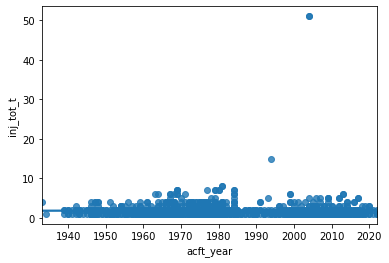

In [4]:
regplot(x='acft_year', y='inj_tot_t', data=df)

In [5]:
(df_train, df_test) = train_test_split(X_full, train_size=0.8, test_size=0.2, random_state=0)
df_train.head()

,ev_time,ev_year,sky_nonceil_ht,sky_ceil_ht,vis_sm,wx_temp,wx_dew_pt,wind_vel_kts,gust_kts,inj_tot_t,...,acft_fire_UNK,second_pilot_N,second_pilot_Y,carb_fuel_injection_CARB,carb_fuel_injection_FINJ,eng_type_REC,eng_type_TF,eng_type_TJ,eng_type_TP,eng_type_TS
5796,2045.0,2017,1900.0,0.0,10.0,70.0,63.0,7.0,0.0,1.0,...,0,1,0,1,0,1,0,0,0,0
14123,245.0,2014,0.0,0.0,10.0,70.0,18.0,5.0,0.0,2.0,...,0,1,0,0,1,1,0,0,0,0
14410,1848.0,2017,0.0,10000.0,10.0,39.0,21.0,12.0,0.0,1.0,...,0,1,0,0,1,0,0,0,1,0
12399,1510.0,2016,0.0,0.0,10.0,48.0,21.0,12.0,0.0,2.0,...,0,0,1,1,0,1,0,0,0,0
3193,2106.0,2019,4500.0,6000.0,10.0,88.0,72.0,4.0,0.0,2.0,...,0,0,1,0,1,1,0,0,0,0


In [6]:
lr = LinearRegression()
feature_name = []
R2_train = []
R2_test = []

y_train = df_train.iloc[:, -1]
y_test = df_test.iloc[:, -1]

for k in range(df.shape[1]-1):
    x_train = df_train.iloc[:, k]
    x_test = df_test.iloc[:, k]
    lr.fit(x_train.values.reshape(-1, 1), y_train)
    feature_name.append(df.columns[k])
    R2_train.append(lr.score(x_train.values.reshape(-1, 1), y_train))
    R2_test.append(lr.score(x_test.values.reshape(-1, 1), y_test))
results = pd.DataFrame()
results['feature']= feature_name
results['train R2'] = R2_train
results['test R2'] = R2_test
R2_train
R2_test

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [7]:
results.sort_values('test R2', ascending = False).round(2)

,feature,train R2,test R2
0,ev_time,0.00,0.0
14,inj_tot_m,0.00,0.0
25,power_units,0.00,0.0
24,acft_year,0.00,0.0
23,rwy_len,0.00,0.0
22,second_pilot,0.00,0.0
21,afm_hrs_last_insp,0.00,0.0
20,num_eng,0.00,0.0
19,total_seats,0.01,0.0
18,acft_fire,0.00,0.0
